In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None


In [16]:
sp=pd.read_csv('StudentsPerformance.csv')
sp.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
def predict_subject_score(row,subject):
  base = sp[subject].mean()

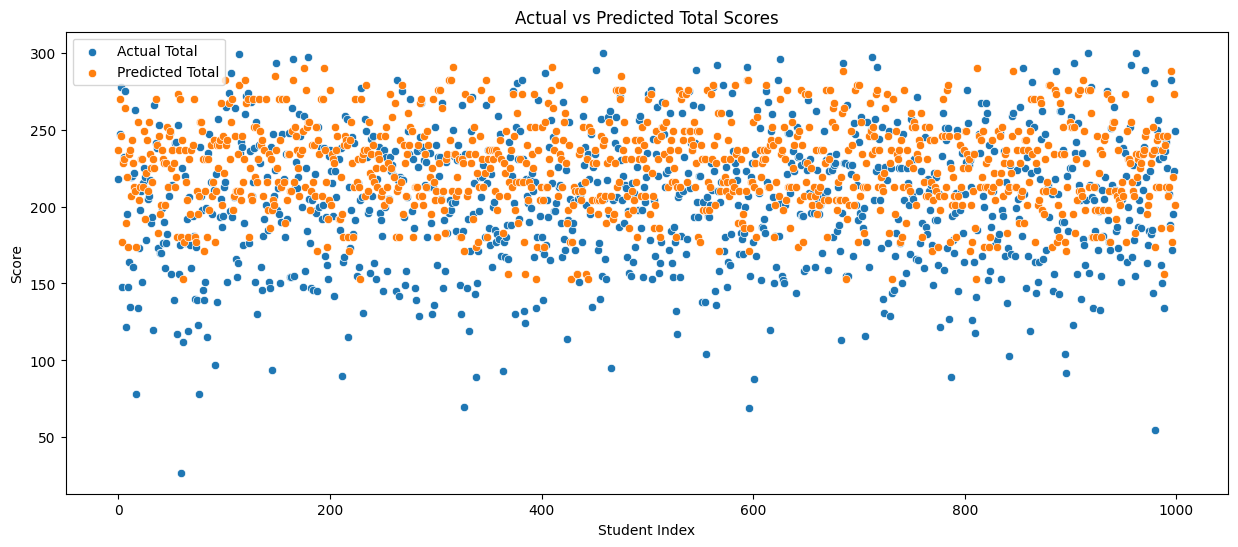

In [21]:
def predict_subject_score(row,subject):
    base = sp[subject].mean()

    if row['gender']=='female':
        if subject in  ['reading score','writing score']:
           base += 5
        if subject == 'math score':
           base -= 3
    else:
        if subject == 'math score':
           base += 4


    if row['lunch']== 'standard':
        base += 6
    else:
        base -= 5


    if row['test preparation course'] == 'completed':
        base += 8
    else:
        base -= 5

    pe = row['parental level of education']
    if "master" in pe.lower():
        base += 10
    elif "bachelor" in pe.lower():
        base += 7
    elif "associate" in pe.lower():
        base += 5
    elif "some college" in pe.lower():
        base += 3
    else:
        base -= 3


    group_adj = {
         'group A': -5, 'group B': +1, 'group C': +3,
         'group D': +4, 'group E': +2
    }
    base += group_adj.get(row['race/ethnicity'],0)


    if base < 0:
       base = 0
    if base > 100:
       base = 100

    return round(base)


sp['pred_math'] = sp.apply(lambda x: predict_subject_score(x,'math score'), axis=1)
sp['pred_reading'] = sp.apply(lambda x: predict_subject_score(x,'reading score'), axis=1)
sp['pred_writing'] = sp.apply(lambda x: predict_subject_score(x,'writing score'), axis=1)

sp['pred_total'] = sp['pred_math'] + sp['pred_reading'] + sp['pred_writing']
sp['pred_percentage'] = (sp['pred_total'] / 3).round()

sp['total_score'] = sp['math score'] + sp['reading score'] + sp['writing score']

plt.figure(figsize=(15,6))
sns.scatterplot(x=sp.index, y=sp['total_score'], label='Actual Total')
sns.scatterplot(x=sp.index, y=sp['pred_total'], label='Predicted Total')
plt.title("Actual vs Predicted Total Scores")
plt.xlabel("Student Index")
plt.ylabel("Score")
plt.legend()
plt.show()